<a href="https://colab.research.google.com/github/IronBlacklion/challengeXtelecom/blob/main/TelecomX_prt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📚 Librerías

In [ ]:
#Librerías
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

#🔍 Conociendo los datos


**Objetivo del Proyecto**

Telecom X presenta una elevada tasa de cancelación de servicios por parte de sus clientes, lo cual impacta negativamente en la rentabilidad y sostenibilidad del negocio. El propósito de este proyecto es analizar los datos disponibles para identificar los principales factores que inciden en la pérdida de clientes, con el fin de proporcionar información valiosa que permita implementar acciones estratégicas orientadas a mejorar la retención y reducir la evasión.

**Direccionario Diccionario de datos**
- `customerID:` número de identificación único de cada cliente
- `Churn:` si el cliente dejó o no la empresa
-`gender:` género (masculino y femenino)
-`SeniorCitizen:` información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner:` si el cliente tiene o no una pareja
- `Dependents:` si el cliente tiene o no dependientes
- `tenure:` meses de contrato del cliente
- `PhoneService:` suscripción al servicio telefónico
- `MultipleLines:` suscripción a más de una línea telefónica
- `InternetService:` suscripción a un proveedor de internet
- `OnlineSecurity:` suscripción adicional de seguridad en línea
- `OnlineBackup:` suscripción adicional de respaldo en línea
- `DeviceProtection:` suscripción adicional de protección del dispositivo
- `TechSupport:` suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV:` suscripción de televisión por cable
- `StreamingMovies:` suscripción de streaming de películas
-` Contract:` tipo de contrato
- `PaperlessBilling:` si el cliente prefiere recibir la factura en línea
- `PaymentMethod:` forma de pago
- `Charges.Monthly:` total de todos los servicios del cliente por mes
- `Charges.Total:` total gastado por el cliente

#📌 Extracción

In [ ]:
#Donde se encuentran los Datos
url ='https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

#Descarga el contenido de la url
response = requests.get(url)

#Transforma la respuesta a formato JSON
data = response.json()

#Crea el DataFrame
df = pd.DataFrame(data)

In [ ]:
df.sample(5)

,customerID,Churn,customer,phone,internet,account
2090,2933-FILNV,Yes,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'No', 'MultipleLines': 'No ph...","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3205,4475-NVTLU,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Two year', 'PaperlessBilling': '..."
6256,8610-ZIKJJ,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'One year', 'PaperlessBilling': '..."
218,0328-GRPMV,Yes,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2333,3253-HKOKL,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'One year', 'PaperlessBilling': '..."


In [ ]:
#Columnas del dataset
df.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [ ]:
#Columnas no normalizadas
cols_anidadas = df.columns[2:]

#Normalización y unión con el dataframe
for col in cols_anidadas:
  norm = pd.json_normalize(df[col])
  df.drop(col, axis=1, inplace=True)
  df = df.join(norm)

#Revisión
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
#Resumen general de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
#Análisis Descriptivo
df.describe()

,SeniorCitizen,tenure,Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [ ]:
#Verificando que no existan datos Duplicados
print("Numero de duplicados", df.duplicated().sum())

Numero de duplicados 0


In [ ]:
#Verificando que no existan datos nulos
print("Numero de nulos\n", df.isnull().sum())

Numero de nulos
 customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [ ]:
#Verificando que no existan datos vacíos o en blanco
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


#🔧 Transformación

In [ ]:
#eliminar filas que tengan la columna  'Charges.Total' vacía (espacios o strings vacíos)
df = df[df['Charges.Total'].str.strip() != '']

#Cambiar el tipo de la columna a float
df['Charges.Total'] = df['Charges.Total'].astype(float)

In [ ]:
#Eliminar la columna customerID ya que no es relevante para el analisis
df = df.drop('customerID', axis=1, errors='ignore')

In [ ]:
df.Churn.value_counts()

,count
Churn,
No,5163
Yes,1869
,224


In [ ]:
# Eliminar filas donde la columna 'Churn' está vacía ('')
df = df[df['Churn'] != '']
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
#Creando la columna para almacenar el valor diario
df['Charges.Day'] = df['Charges.Monthly']/30
df['Charges.Day']

,Charges.Day
0,2.186667
1,1.996667
2,2.463333
3,3.266667
4,2.796667
...,...
7262,1.838333
7263,2.836667
7264,1.676667
7265,2.261667


#📊 Carga y análisis

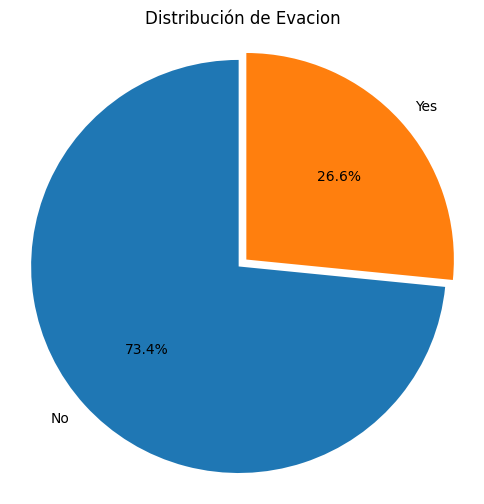

In [ ]:
#Grafico de torta para ver la distribucion de la columna Churn
counts = df['Churn'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, explode=(0.05,0))
plt.title('Distribución de Evacion')
plt.axis('equal')
plt.show()

In [1]:
#Variables categoricas con información personal del cliente a analizar
bar_cols = ['gender','SeniorCitizen', 'Partner', 'Dependents']

#Creando el gráfico
fig, ax = plt.subplots(2,2, figsize=(12,6))
fig.suptitle('Evasión de clientes porinformación personal del cliente')

#Convierte la matriz en un array poder recorrerlos
axes = ax.flatten()

for i, col in enumerate(bar_cols):
  cross = pd.crosstab(df[col], df['Churn'])

  cross.plot(
      kind='bar',
      ax= axes[i],
      rot=45,
      legend=True,
  )

  axes[i].set_title(f"Evasión de clientes por {col}")
  axes[i].set_xlabel("")
  axes[i].set_ylabel("Cantidad de clientes")
  axes[i].set_ylim(0, 5000)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

NameError: name 'plt' is not defined

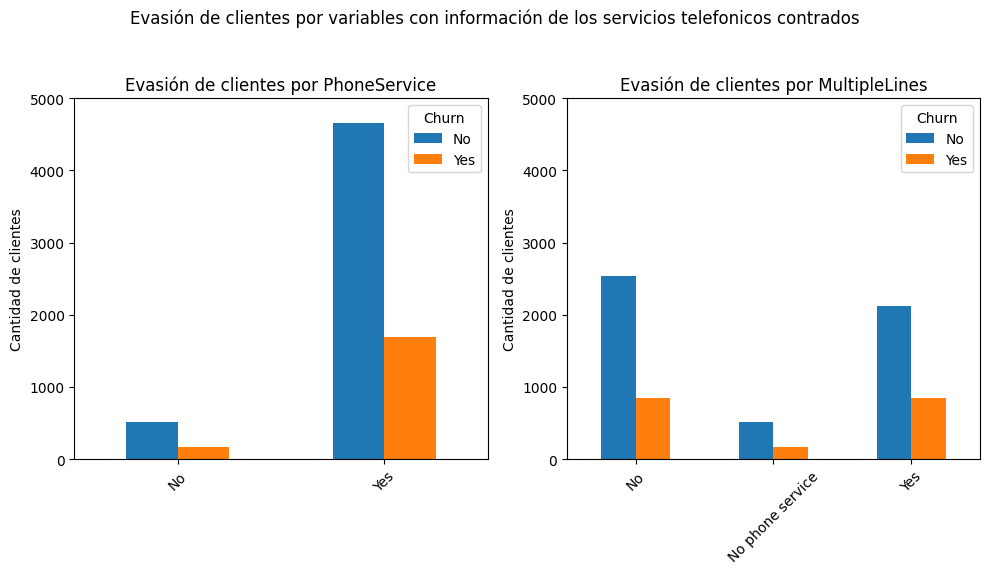

In [ ]:
#Variables categoricas con información de los servicios telefonicos contrados
bar_cols = ['PhoneService','MultipleLines']

#Creando el gráfico
fig, ax = plt.subplots(1,2, figsize=(10,6))
fig.suptitle('Evasión de clientes por variables con información de los servicios telefonicos contrados')

#Convierte la matriz en un array poder recorrerlos
axes = ax.flatten()

for i, col in enumerate(bar_cols):
  cross = pd.crosstab(df[col], df['Churn'])

  cross.plot(
      kind='bar',
      ax= axes[i],
      rot=45,
      legend=True,
  )

  axes[i].set_title(f"Evasión de clientes por {col}")
  axes[i].set_xlabel("")
  axes[i].set_ylabel("Cantidad de clientes")
  axes[i].set_ylim(0, 5000)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

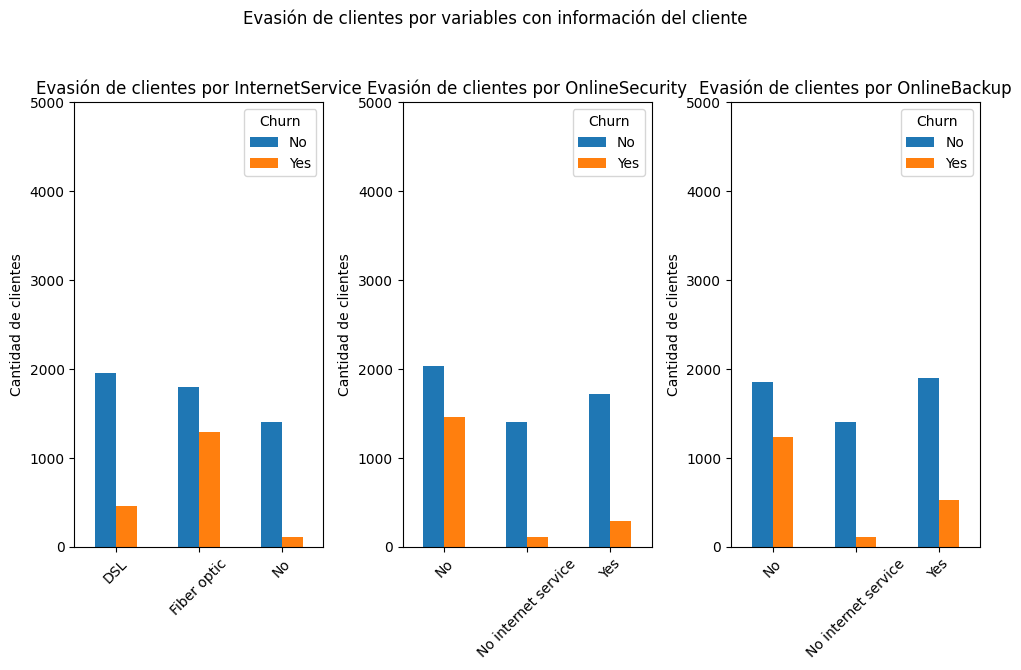

In [ ]:
#Variables categoricas con información de los servicios de internet
bar_cols = ['InternetService', 'OnlineSecurity','OnlineBackup']

#Creando el gráfico
fig, ax = plt.subplots(1,3, figsize=(10,7))
fig.suptitle('Evasión de clientes por variables con información del cliente')

#Convierte la matriz en un array poder recorrerlos
axes = ax.flatten()

for i, col in enumerate(bar_cols):
  cross = pd.crosstab(df[col], df['Churn'])

  cross.plot(
      kind='bar',
      ax= axes[i],
      rot=45,
      legend=True,
  )

  axes[i].set_title(f"Evasión de clientes por {col}")
  axes[i].set_xlabel("")
  axes[i].set_ylabel("Cantidad de clientes")
  axes[i].set_ylim(0, 5000)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

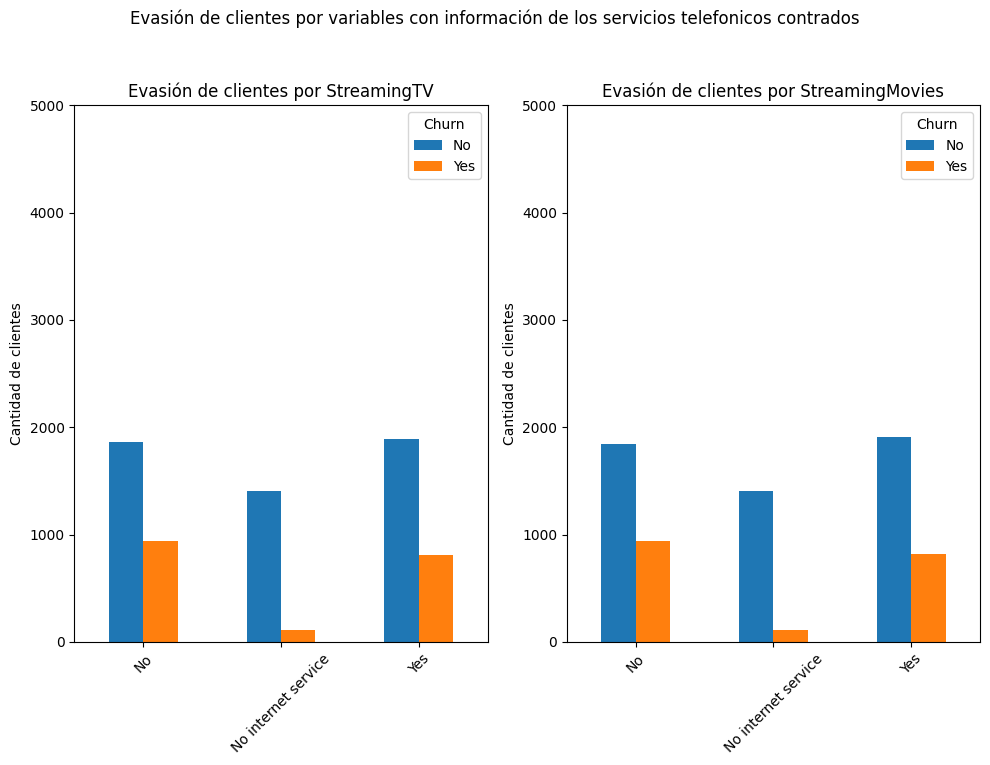

In [ ]:
#Variables categoricas con información de los servicios de streaming contrados
bar_cols = ['StreamingTV', 'StreamingMovies']

#Creando el gráfico
fig, ax = plt.subplots(1,2, figsize=(10,8))
fig.suptitle('Evasión de clientes por variables con información de los servicios telefonicos contrados')

#Convierte la matriz en un array poder recorrerlos
axes = ax.flatten()

for i, col in enumerate(bar_cols):
  cross = pd.crosstab(df[col], df['Churn'])

  cross.plot(
      kind='bar',
      ax= axes[i],
      rot=45,
      legend=True,
  )

  axes[i].set_title(f"Evasión de clientes por {col}")
  axes[i].set_xlabel("")
  axes[i].set_ylabel("Cantidad de clientes")
  axes[i].set_ylim(0, 5000)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
px.histogram(df, x = 'tenure', text_auto = True, color = 'Churn', barmode = 'group')

In [ ]:
px.histogram(df, x = 'PaymentMethod',  text_auto = True, color = 'Churn', barmode = 'group')

In [ ]:
px.histogram(df, x = 'Contract', text_auto = True, color = 'Churn', barmode = 'group')

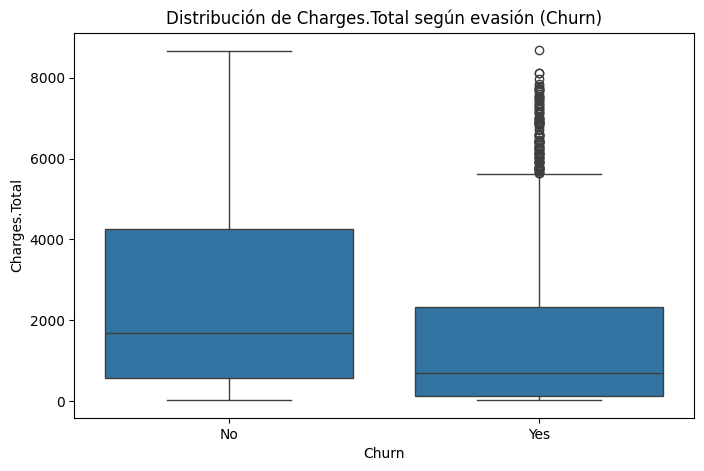

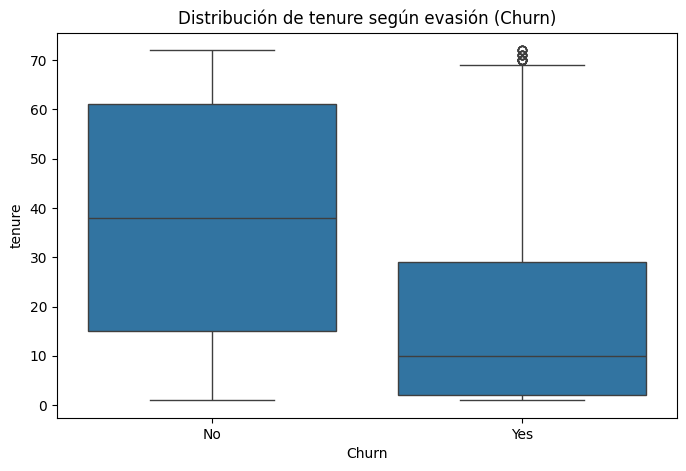

In [ ]:
numeric_cols = ['Charges.Total', 'tenure']

for col in numeric_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'Distribución de {col} según evasión (Churn)')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.show()

# Normalizando los datos

In [ ]:
# Detección automática de columnas
col_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
col_categoricas = df.select_dtypes(include=['object']).columns.tolist()

# Dentro de las categóricas, identificar las binarias (máximo 2 valores únicos)
col_binarias = [col for col in col_categoricas if df[col].nunique(dropna=False) <= 2]

# El resto de categóricas (no binarias)
col_categoricas_no_binarias = list(set(col_categoricas) - set(col_binarias))

print(f'Las columnas numericas son: {col_numericas}')
print(f'Las columnas categoricas binarias son: {col_binarias}')
print(f'Las columnas categoricas con multiples opciones son: {col_categoricas_no_binarias}')

Las columnas numericas son: ['SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total', 'Charges.Day']
Las columnas categoricas binarias son: ['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
Las columnas categoricas con multiples opciones son: ['OnlineBackup', 'InternetService', 'StreamingMovies', 'TechSupport', 'Contract', 'OnlineSecurity', 'DeviceProtection', 'StreamingTV', 'PaymentMethod', 'MultipleLines']


In [ ]:
#Transformando columnas categoricas binarias
cols_categoricas_binarias = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
df[cols_categoricas_binarias] = df[cols_categoricas_binarias].replace({'No' : 0, 'Yes': 1})

df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1})
df

/tmp/ipython-input-373138547.py:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipython-input-373138547.py:5: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Day
0,0,1,0,1,1,9,1,No,DSL,No,...,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.30,2.186667
1,0,0,0,0,0,9,1,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,1,0,0,0,0,4,1,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,1,0,1,1,0,13,1,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,1,1,1,1,0,3,1,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,1,0,0,0,13,1,No,DSL,Yes,...,No,Yes,No,No,One year,0,Mailed check,55.15,742.90,1.838333
7263,1,0,0,1,0,22,1,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7264,0,0,0,0,0,2,1,No,DSL,No,...,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7265,0,0,0,1,1,67,1,No,DSL,Yes,...,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65,2.261667


In [ ]:
#Transformando columnas categoricas
df = pd.get_dummies(data = df, columns=col_categoricas_no_binarias, dtype=int)
df

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,...,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
0,0,1,0,1,1,9,1,1,65.60,593.30,...,0,0,1,0,0,0,1,1,0,0
1,0,0,0,0,0,9,1,0,59.90,542.40,...,1,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,4,1,1,73.90,280.85,...,1,0,0,0,0,1,0,1,0,0
3,1,0,1,1,0,13,1,1,98.00,1237.85,...,0,0,1,0,0,1,0,1,0,0
4,1,1,1,1,0,3,1,1,83.90,267.40,...,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,1,0,0,0,13,1,0,55.15,742.90,...,1,0,0,0,0,0,1,1,0,0
7263,1,0,0,1,0,22,1,1,85.10,1873.70,...,1,0,0,0,0,1,0,0,0,1
7264,0,0,0,0,0,2,1,1,50.30,92.75,...,1,0,0,0,0,0,1,1,0,0
7265,0,0,0,1,1,67,1,0,67.85,4627.65,...,1,0,0,0,0,0,1,1,0,0


In [ ]:
#Agregrar la nueva columnna a la lista de col_numericas
col_numericas.append('Charges.Day')

In [ ]:
#Normalizando los datos
normalizacion = MinMaxScaler()
df[col_numericas] = normalizacion.fit_transform(df[col_numericas])
df

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,...,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
0,0,1,0.0,1,1,0.112676,1,1,0.471144,0.066294,...,0,0,1,0,0,0,1,1,0,0
1,0,0,0.0,0,0,0.112676,1,0,0.414428,0.060420,...,1,0,0,0,0,0,1,0,0,1
2,1,0,0.0,0,0,0.042254,1,1,0.553731,0.030239,...,1,0,0,0,0,1,0,1,0,0
3,1,0,1.0,1,0,0.169014,1,1,0.793532,0.140670,...,0,0,1,0,0,1,0,1,0,0
4,1,1,1.0,1,0,0.028169,1,1,0.653234,0.028687,...,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,1,0.0,0,0,0.169014,1,0,0.367164,0.083556,...,1,0,0,0,0,0,1,1,0,0
7263,1,0,0.0,1,0,0.295775,1,1,0.665174,0.214043,...,1,0,0,0,0,1,0,0,0,1
7264,0,0,0.0,0,0,0.014085,1,1,0.318905,0.008533,...,1,0,0,0,0,0,1,1,0,0
7265,0,0,0.0,1,1,0.929577,1,0,0.493532,0.531831,...,1,0,0,0,0,0,1,1,0,0


In [ ]:
#Analizando la correlacion
correlaciones = df.corr()[['Churn']].sort_values(by='Churn', ascending=False)
correlaciones

,Churn
Churn,1.000000
Contract_Month-to-month,0.404565
OnlineSecurity_No,0.342235
TechSupport_No,0.336877
InternetService_Fiber optic,0.307463
PaymentMethod_Electronic check,0.301455
OnlineBackup_No,0.267595
DeviceProtection_No,0.252056
Charges.Day,0.192858
Charges.Monthly,0.192858


#📄Parte final




El siguiente informe resume el análisis realizado para identificar los factores clave de la evasión de clientes (Churn) en Telecom X, siguiendo los pasos de exploración y tratamiento de los datos.

## * Introducción
El objetivo principal de este proyecto fue analizar los datos de los clientes de Telecom X para entender y mitigar la alta tasa de cancelación de servicios. La evasión de clientes es un problema significativo que impacta negativamente la rentabilidad y la sostenibilidad del negocio. A través de este análisis, se buscó identificar los principales factores que impulsan a los clientes a abandonar la empresa, con el fin de proponer estrategias de retención efectivas.

##* Limpieza y Tratamiento de Datos
El proceso de preparación de los datos se inició extrayendo la información desde un archivo JSON alojado en una URL. Posteriormente, el DataFrame se normalizó para descomponer las columnas anidadas  en columnas individuales, facilitando así el análisis. Durante este proceso, se identificaron y trataron los valores vacios en la columna Charges.Total y Churn. También se eliminaron las filas que contenían valores vacios para garantizar la integridad del análisis. Finalmente, se ajustaron los tipos de datos de las columnas para su correcto procesamiento, convirtiendo Charges.Total a un formato numérico.

##* Análisis Exploratorio de Datos
El análisis exploratorio de datos reveló varios patrones y factores influyentes en la tasa de Churn. Los principales hallazgos fueron los siguientes:

- Servicio y Contrato: Los clientes con servicio de fibra óptica y contratos de mes a mes presentan una tasa de evasión considerablemente más alta que otros segmentos.

- Demografía y Características:
-- Los clientes de la tercera edad tienen una probabilidad significativamente mayor de abandonar la empresa.
-- Los clientes que no tienen pareja ni dependientes muestran una mayor tasa de Churn.
-- El método de pago más asociado a la evasión es el cheque electrónico.
-- Los clientes con facturación electrónica tienen una tasa de Churn más alta en comparación con la facturación física.

- Antigüedad y Costos:
-- Los clientes con una antigüedad corta (menor tiempo de servicio) son los más propensos a la evasión.
-- Se observó que los clientes que se dan de baja tienen cargos mensuales más altos pero cargos totales más bajos, lo que refuerza el impacto de los contratos a corto plazo y la antigüedad.

- Servicios Adicionales: Los clientes que carecen de servicios de seguridad en línea, respaldo, protección de dispositivos y soporte técnico, tienen una mayor probabilidad de darse de baja.

## * Conclusiones
El análisis confirma que la evasión de clientes en Telecom X no es un fenómeno aleatorio. Los clientes más vulnerables a la evasión son aquellos con un perfil específico:

- Son nuevos clientes con contratos de mes a mes.

- Utilizan el servicio de fibra óptica.

- Pagan mediante cheque electrónico.

- No han contratado servicios adicionales de seguridad o soporte.

- Pertenecen al segmento de la tercera edad.

Estos insights sugieren que la satisfacción del cliente se deteriora rápidamente al inicio del servicio, especialmente para aquellos que se sienten menos seguros o que no están en una relación de largo plazo con la empresa.


